In [266]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [100]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [203]:
ratings[1]

array([ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [279]:
from scipy.spatial import distance
from sklearn.metrics import pairwise_distances

In [280]:
distance.cosine(ratings[0], ratings[1])

0.17397080850739877

In [281]:
X = np.array(ratings)
Y = np.array(ratings)

In [282]:
import sklearn
sim = sklearn.metrics.pairwise.cosine_similarity(X, Y)

In [283]:
sim = np.matrix(sim)
sim = np.round(sim, decimals = 2)
sim

array([[1.  , 0.83, 0.85, 0.78, 0.82, 0.74, 0.73, 0.81, 0.91, 0.86],
       [0.83, 1.  , 0.81, 0.85, 0.87, 0.83, 0.83, 0.8 , 0.83, 0.82],
       [0.85, 0.81, 1.  , 0.85, 0.78, 0.79, 0.68, 0.76, 0.82, 0.92],
       [0.78, 0.85, 0.85, 1.  , 0.69, 0.79, 0.83, 0.83, 0.78, 0.86],
       [0.82, 0.87, 0.78, 0.69, 1.  , 0.78, 0.78, 0.81, 0.88, 0.85],
       [0.74, 0.83, 0.79, 0.79, 0.78, 1.  , 0.74, 0.84, 0.81, 0.86],
       [0.73, 0.83, 0.68, 0.83, 0.78, 0.74, 1.  , 0.83, 0.81, 0.79],
       [0.81, 0.8 , 0.76, 0.83, 0.81, 0.84, 0.83, 1.  , 0.8 , 0.84],
       [0.91, 0.83, 0.82, 0.78, 0.88, 0.81, 0.81, 0.8 , 1.  , 0.9 ],
       [0.86, 0.82, 0.92, 0.86, 0.85, 0.86, 0.79, 0.84, 0.9 , 1.  ]])

In [314]:
for row in sim:
    a = np.where(row==1.00, 0, row)
    print(a.argmax())

8
4
9
9
8
9
1
5
0
2


In [ ]:
# номер элемента в каждой строке, который маскимально близок к данной строке по косинусной мере

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [315]:
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [317]:
from sklearn.decomposition import TruncatedSVD

In [319]:
svd = TruncatedSVD(n_components=3)
svd.fit(sim)  
sim_new=svd.fit_transform(sim)
sim_new

array([[ 2.63648769, -0.15637203,  0.04165213],
       [ 2.67841255,  0.05344461,  0.04219359],
       [ 2.61423745, -0.16823355, -0.15851549],
       [ 2.61158202,  0.11508323, -0.19450809],
       [ 2.61327687, -0.06291314,  0.20325049],
       [ 2.5868106 ,  0.04438318, -0.05487149],
       [ 2.53376547,  0.24346458,  0.07845001],
       [ 2.63016823,  0.12434985,  0.00448292],
       [ 2.70268243, -0.09544956,  0.10298903],
       [ 2.75332723, -0.0828072 , -0.06485799]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [94]:
from scipy.misc import derivative
from math import *
def func(x):
    return (tan(sin(x)) + cos(2*x +3))**2

In [99]:
derivative(func, 1.0)

1.5875113528232174

In [ ]:
# (cos(x)sec2(sin(x))−2sin(2x+3))(tan(sin(x))+cos(2x+3))

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [70]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [71]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [72]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

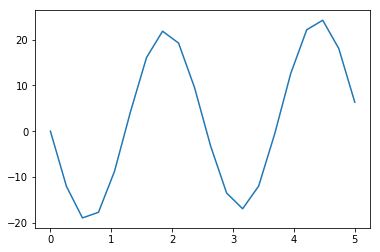

In [73]:
plt.plot(x, fx)
plt.show()

In [74]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [83]:
res = minimize(error, (0,0), method ='COBYLA')
res

     fun: 0.07674566113889902
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [12]:
import scipy.stats as sts
mu = 3.0
sigma = 0.5

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерируем 10 значений
a = norm_rv.rvs(size=20)

In [13]:
np.random.choice(a, 50)

array([2.81292792, 3.87525137, 2.73493752, 3.82231884, 3.1677735 ,
       3.39072034, 3.82231884, 3.10261528, 2.91349712, 3.30039451,
       2.36820984, 2.51668404, 3.39072034, 3.33003935, 2.36820984,
       3.30039451, 3.30039451, 3.82231884, 2.39583977, 3.30039451,
       3.10261528, 3.1677735 , 3.87525137, 2.51668404, 3.61243824,
       3.61243824, 2.64374941, 3.39072034, 3.33003935, 2.38043723,
       2.65204776, 3.39072034, 2.38043723, 3.1677735 , 3.82231884,
       2.73493752, 2.38043723, 2.64374941, 2.5821714 , 2.51668404,
       3.39072034, 2.68961471, 3.33003935, 2.68961471, 2.73493752,
       2.38043723, 3.82231884, 3.10261528, 3.61243824, 2.68961471])

In [15]:
def sample(a):
    for number in a:
        return np.random.choice(a, 50)

In [16]:
sample(a)

array([3.61243824, 2.36820984, 2.39583977, 2.51668404, 3.39072034,
       3.39072034, 3.61243824, 2.73493752, 2.99541962, 3.1677735 ,
       2.64374941, 2.5821714 , 3.87525137, 2.36820984, 2.38043723,
       3.82231884, 2.38043723, 2.68961471, 2.36820984, 2.5821714 ,
       2.39583977, 3.87525137, 3.30039451, 3.82231884, 2.39583977,
       3.10261528, 3.87525137, 2.51668404, 2.91349712, 3.82231884,
       2.39583977, 2.99541962, 2.81292792, 2.73493752, 2.91349712,
       2.51668404, 2.91349712, 2.64374941, 2.38043723, 2.36820984,
       2.5821714 , 2.38043723, 2.81292792, 2.68961471, 3.33003935,
       3.82231884, 2.81292792, 3.82231884, 2.91349712, 2.65204776])

In [23]:
samples = []
for i in range (0,100):
    if i<100:
        samples.append(sample(a))

In [38]:
samples[0]

array([2.81292792, 3.1677735 , 2.36820984, 2.99541962, 2.73493752,
       3.39072034, 2.73493752, 2.68961471, 2.81292792, 2.73493752,
       2.5821714 , 2.68961471, 3.87525137, 3.61243824, 2.39583977,
       3.39072034, 3.1677735 , 2.73493752, 3.30039451, 3.39072034,
       2.65204776, 3.1677735 , 3.61243824, 2.39583977, 2.73493752,
       3.82231884, 2.64374941, 3.10261528, 2.73493752, 3.33003935,
       3.33003935, 3.10261528, 3.61243824, 3.30039451, 2.65204776,
       3.1677735 , 3.30039451, 3.39072034, 3.39072034, 2.73493752,
       3.10261528, 2.39583977, 2.73493752, 2.73493752, 3.82231884,
       3.1677735 , 3.10261528, 2.36820984, 3.39072034, 2.65204776])

In [25]:
len(samples)

100

In [31]:
np.mean(samples[0])

3.0246612450744563

In [37]:
means = [np.mean(sample) for sample in samples]
means[:3]

[3.0246612450744563, 3.0217073470189564, 2.904898254900859]

(array([ 2.,  6., 17., 17., 22., 12., 16.,  7.,  0.,  1.]),
 array([2.82498997, 2.85609872, 2.88720747, 2.91831622, 2.94942497,
        2.98053372, 3.01164247, 3.04275122, 3.07385997, 3.10496872,
        3.13607747]),
 <a list of 10 Patch objects>)

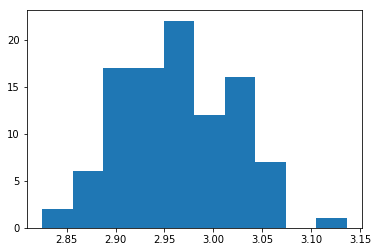

In [36]:
plt.hist(means)

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [5]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [6]:
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
